## Practicals 01: Mean Covariance and Correlation of Random Vectors

**Name:**  Ashish Vishnu

**RegNo:**  20MDT1005

__AIM:__
    
1. Exploring the mean vector, variance-convariance matrix and the correlation matrix. 
1. Understanding the operations on data such as transforming the data
1. Understanding the linear relationship between the data.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Question:**

Consider the data on the height (in inches) and weight (in lbs.) of 20 college-age males from the file `HeightWeight.xlsx`

 1. Plot the scatter plot and Height Vs Weight
 1. Fit a linear polynomial to the data, and visualize that whether the data has linear relationship
 1. Find the mean vector, covariance matrix and correlation matrix.
 1. Using matrix operation, create a new dataset where the hei ght and weight information from the observations are measured in metres and kilogr ams, respectively, in the height and weight data of 20 college-age males.
 1. Calculate the covariance between height and weight in the new dataset. Compare it to the covariance in the original dataset. Do you see a difference?
 1. Calculate as well the correlation between height and weight in the new dataset using the matrix operation on the covariance matrix. Compare it to the correlation in the original dataset. Do you now see a difference?
 1. Whether a person having more weight is likely to be taller?

In [75]:
hw = pd.read_excel('data/HeightWeight.xlsx')
hw.head()

,Height,Weight
0,69,153
1,74,175
2,68,155
3,70,135
4,72,172


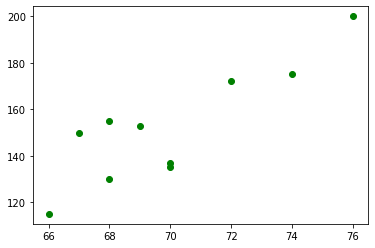

In [76]:
#1. Scatter plot
plt.scatter(hw.Height,hw.Weight,color="green")
plt.show()

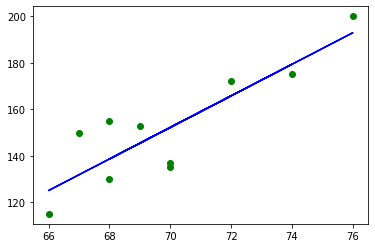

In [77]:
#2.Linear fit 
[m,c]=np.polyfit(hw.Height,hw.Weight,deg=1)
plt.plot(hw.Height,(m*hw.Height+c),color="blue")
plt.scatter(hw.Height,hw.Weight,color="green")
plt.show()

**Ans:** Yes, the data has a linear relationship as height increaes the weight is also increasing

In [78]:
#3. Mean,Covariance and Correlation of the data
x=np.array(hw["Height"])
y=np.array(hw["Weight"])

arr=np.array([x,y]).transpose()
One=np.ones(len(arr))
meanVector=(1/len(arr))*arr.transpose().dot(One)
print(f"mean height is {meanVector[0]} and Mean Weight is {meanVector[1]}\n")

Y=arr-np.outer(One,meanVector)
Covmat=(1/(len(arr)-1))*Y.transpose().dot(Y)
print(f"Covariance matrix \n\n{Covmat}")

D=np.zeros(Covmat.shape)
for i in range(len(Covmat)):
    D[i][i]=1/(np.sqrt(Covmat[i][i]))
corr=D@Covmat@D
print(f"\nCorrelation matrix\n \n{corr}")

mean height is 70.0 and Mean Weight is 152.20000000000002

Covariance matrix 

[[ 10.          67.88888889]
 [ 67.88888889 623.73333333]]

Correlation matrix
 
[[1.         0.85960558]
 [0.85960558 1.        ]]


In [79]:
#4. converting Heights in meters and Weight in Kg's.
new_x=x*0.0254 #to meters
new_y=y*0.453592 #to kgs.
print(f"New Height(in meters)\n {new_x}\nNew Weight (in Kilograms)\n {new_y}")

New Height(in meters)
 [1.7526 1.8796 1.7272 1.778  1.8288 1.7018 1.6764 1.778  1.9304 1.7272]
New Weight (in Kilograms)
 [69.399576 79.3786   70.30676  61.23492  78.017824 68.0388   52.16308
 62.142104 90.7184   58.96696 ]


In [80]:
#5.Covariance of the modified data
new_Y,new_Covmat,new_arr=0,0,0
new_arr=np.array([new_x,new_y]).transpose()
One=np.ones(len(new_arr))
new_meanVector=(1/len(new_arr))*new_arr.transpose().dot(One)
print(f"mean height is {new_meanVector[0]} and Mean Weight is {new_meanVector[1]}\n")

new_Y=new_arr-np.outer(One,new_meanVector)
new_Covmat=(1/(len(new_arr)-1))*new_Y.transpose().dot(new_Y)
print(f"Covariance matrix \n{new_Covmat}")

mean height is 1.7780000000000002 and Mean Weight is 69.03670240000001

Covariance matrix 
[[6.45160000e-03 7.82163965e-01]
 [7.82163965e-01 1.28330453e+02]]


**Answer:** Yes, there is a significant differnce in first and modified height,weight data.

In [81]:
#6. Correlation matrix of modified data
new_D=np.zeros(new_Covmat.shape)
for i in range(len(new_Covmat)):
    new_D[i][i]=1/np.sqrt(new_Covmat[i][i])
new_corr=new_D@new_Covmat@new_D
print(f"\nCorrelation matrix\n \n{new_corr}")


Correlation matrix
 
[[1.         0.85960558]
 [0.85960558 1.        ]]


**Answer:** No, there is no change in the correlation between height and weight.

## Judges Dataset

In a baking competition, there are three judges who would score a cake created by each
participant from zero (inedible) to ten (excellent). 
There are ten contestants in the competition, and the matrix
of scores are given in the dataset `3judges.csv`. Answer the following questions.

1. Which judge gives higher scores than the others?

1. What is the total and average score that each contestant received?
1. The host of the competition realises that the first judge had a cold and the score he gave is not entirely reliable. So the host suggests that the scores given by Judge 1 are weighted by 0.5, by Judge 2 are weighted by 1.25, and by Judge 3 are weighted by 1.25 as well. In this new scheme of scoring, what are the total scores that each individual receives?
1. Judge 1 protested the new scheme and suggested a different scoring scheme. He suggested that the weights should be 0.5, 1.0, and 1.0 for Judge 1 to Judge 3 respectively. In this scheme, what is the average score per participant

In [82]:
judges = pd.read_csv('data/3judges.csv')
judges.head()

,J1,J2,J3
0,7,7,7
1,6,7,7
2,5,6,4
3,6,7,6
4,7,8,7


In [83]:
#1. Score of judges
print(judges.sum(axis=0))

J1     54
 J2    63
J3     52
dtype: int64


**Answer:** Second Judge gave the highest marks

In [84]:
#2. Score of contestant
print(f"Total score of contestant\n{judges.sum(axis=1)}")
J1=np.array(judges['J1'])
J3=np.array(judges['J3'])
J2=np.array(judges[' J2'])

mat=np.array([J1,J2,J3])
One=np.ones(len(mat))
avg=1/len(mat)*(mat.transpose().dot(One))
print(f"\nAverage score of contestant:\n\n{avg.transpose()}")

Total score of contestant
0    21
1    20
2    15
3    19
4    22
5    22
6    16
7    19
8    15
dtype: int64

Average score of contestant:

[7.         6.66666667 5.         6.33333333 7.33333333 7.33333333
 5.33333333 6.33333333 5.        ]


In [85]:
#3. Weighted judges scores
J1=np.array(judges['J1']*0.5)
J3=np.array(judges['J3']*1.25)
J2=np.array(judges[' J2']*1.25)
jud=np.array([J1,J2,J3])
print(f" The new scores are :\n\n{jud.transpose().sum(axis=1)}")

 The new scores are :

[21.   20.5  15.   19.25 22.25 22.25 16.25 19.25 15.  ]


In [86]:
#4. Average score of weighted judges sore in new format
J1=np.array(judges['J1']*0.5)
J3=np.array(judges['J3'])
J2=np.array(judges[' J2'])
new_jud=np.array([J1,J2,J3])
One=np.ones(len(new_jud))
avg=1/len(new_jud)*(new_jud.transpose().dot(One))
print(f"\nAverage score of contestant:\n\n{avg.transpose()}")


Average score of contestant:

[5.83333333 5.66666667 4.16666667 5.33333333 6.16666667 6.16666667
 4.5        5.33333333 4.16666667]
